
# Project: Investigate a Dataset - [TMDb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It also has adjusted budget and revenue values in terms of 2010 dollars, accounting for inflation over time. These columns are labelled 'budget_adj' and 'revenue_adj' respectively. The dataset uniquely identifies the movies by id, the movie title, cast crew, directors, duration of the movie, the ratings each movie received, the release date of the various movies, the release year, the genre and the movies' production companies.


### Questions for Analysis
>1. Which are the most and least profitable movies?
>2. How has the average runtime of movies changed from year to year?
>3. Are movies with higher budget generating higher revenues?
>4. Are popular movies highly profitable?

In [1]:
# Importing libraries used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install --upgrade seaborn==0.9.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)
Requirement already up-to-date: seaborn==0.9.0 in /opt/conda/lib/python3.6/site-packages (0.9.0)


<a id='wrangling'></a>
## Data Wrangling

> We now load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Key Take aways from the dataset
1. No unit of currency mentioned, so I have taken the assumption that the currency is in dollars
2. Vote_count doesn't necessarily imply popuparity of the movie

In [4]:
# Getting the column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Checking the data types of various features of the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Getting the information of our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Getting the percentage of missing values in the various columns of our dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column name,percent_missing
id,id,0.000000
imdb_id,imdb_id,0.092030
popularity,popularity,0.000000
budget,budget,0.000000
revenue,revenue,0.000000
original_title,original_title,0.000000
cast,cast,0.699429
homepage,homepage,72.979937
director,director,0.404933
tagline,tagline,25.989324


In [8]:
# Getting some description about our dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10866,NaN,NaN,NaN,66064.2,92130.1,5,10596.2,20669,75610,417859
imdb_id,10856,10855,tt0411951,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,10866,NaN,NaN,NaN,0.646441,1.00018,6.5e-05,0.207583,0.383856,0.713817,32.9858
budget,10866,NaN,NaN,NaN,1.46257e+07,3.09132e+07,0,0,0,1.5e+07,4.25e+08
revenue,10866,NaN,NaN,NaN,3.98233e+07,1.17003e+08,0,0,0,2.4e+07,2.78151e+09
original_title,10866,10571,Hamlet,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,10790,10719,Louis C.K.,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,2936,2896,http://phantasm.com,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,10822,5067,Woody Allen,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tagline,8042,7997,Based on a true story.,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**After having a glimpse of our dataset, The following was observed:**
* There was no datatype mismatch except for the release date column in the variables of our dataset
* Not all the columns are relevant for our analysis for example id, ibmdb_id, homepage, tagline, overview etc
* There are missing values in some columns of our dataset
* There are 0's from the budget and revenue columns, adjusted budget and adjusted revenue columns 


### Data Cleaning
> This is the process where we cnvert or map data from the initial raw form into another format, in order to prepare the data for further analysis. 
Here we shall 


  > * Identify and handle missing values either by
          1. Dropping the variable or dropping the data entry
          2. Imputation with mean, mode or median
          3. Leaving it as missing data
* Removing duplicate rows if any
* Dropping the irrelevant columns for our analysis
* Data Formatting and Standardzation

> Remember we are going to treat the 0's from budget, revenue, adj_budget and adj_revenue columns as missing values

> ### 1. Dropping irrelevant columns and keeping only the columns of interest

In [9]:
# Creating a list of columns to be dropped
irr_columns = ['id', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies']

# dropping irr_columns
df.drop(irr_columns, axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# Check the shape of out dataset after dropping the irrelevant columns 
df.shape

(10866, 13)

> ### 2. Removing Duplicate rows

In [11]:
# Checking for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [12]:
# Removing duplicate rows if any
df.drop_duplicates(inplace = True)

In [13]:
# Checking the shape after removing duplicate rows
df.shape

(10865, 13)

> ### 3. Changing the datatype of the release_date column to standard datetime format

In [14]:
# Change the release_date column datatype to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Checking the release_date column datatype
df['release_date'].dtype

dtype('<M8[ns]')

> ### 4. Drop columns with more than 20% missing values

In [15]:
# Check the shape before dropping
df.shape

(10865, 13)

In [16]:
# Drop columns with more than 20% missing values
df.dropna(thresh = 0.8 * len(df), axis = 1)

# Check shape after dropping, if any was dropped
df.shape

(10865, 13)

> ### 5. Dropping rows with 0's in either the budget or revenue columns

In [17]:
# creating a seperate list of revenue and budget column
temp = ['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp] = df[temp].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp, inplace = True)


rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


In [18]:
# Checking a brief information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 421.5+ KB


In [19]:
# Having a bigger picture of our dataframe
df

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [20]:
# Reset the index of our dataset after dropping the rows
df.reset_index()
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df.shape # Rows and columns of our dataframe respectively after cleaning 

(3854, 13)

In [22]:
# Check the runtime column
df['runtime'].min(), df['runtime'].max()

(15, 338)

In [23]:
# Check for potential missing values
df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              4
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The cast column has 4 missing values but lets treat the values as missing and leave the rows the way they are 

**In the data wrangling phase, the following activities were carried out:**
* 1. Dropping irrelevant columns and keeping the columns of interest
* 2. Checking and removing duplicate rows
* 3. Changing the datatype of the release_date column to the standard datetime format
* 4. Drop columns with more than 20% missing values 
* 5. Dropping rows whose budget or revenue is recorded as zero since the correct values might be missing

Our dataset is now in the correct format for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis
> Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

> We are going to find answers to our research questions here.


### Research Question 1 :- Which is the most and least Profitable Movie?

In [24]:
#calculate Profit for each of the movie and add a new column in the dataframe name 'Profit'
df['Profit'] = df['revenue'] - df['budget']

In [25]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.


def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74
vote_average,7.1,6.4


> The first column shows the highest profit made by a movie and second column shows the least profit (highest in loss) movie in this dataset.

>The 'Avatar' movie Directed by James Cameron, which was produced in the year 2009 earned the highest profit, making over 2.5B in profit whereas the most in loss movie in this dataset is The Warrior's Way making a loss of over 400M was directed by Singmoo Lee and produced in the year 2010

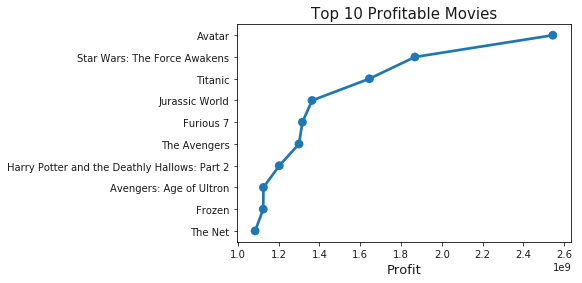

In [26]:
# Plot top 10 movies with the highest profits.
# Sort the 'Profit' column in decending order and store it in the new dataframe

info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

# Make a plot usinG pointplot for top 10 profitable movies.
ax = sns.pointplot(x = y, y = x)

# Set the figure size
sns.set(rc={'figure.figsize':(10,10)})

# Set the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid") # Style of the Plot

### Research Question 2 :- How has the average runtime of movies changed from year to year?

In [27]:
# Get the average of runtime of the movies for each year
df.groupby('release_year').mean().runtime

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
1965    167.600000
1966    132.200000
1967    118.384615
1968    130.777778
1969    127.500000
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
1980    113.304348
1981    105.133333
1982    112.653846
1983    107.677419
1984    108.619048
1985    104.658537
1986    105.125000
1987    103.304348
1988    104.543860
1989    106.705882
1990    108.207547
1991    109.720000
1992    112.830189
1993    111.236111
1994    109.274194
1995    111.543210
1996    109.639535
1997    114.722222
1998    111.271739
1999    109.043103
2000    109.169811
2001    109.008264
2002    106.976378
2003    107.966942
2004    106.904762
2005    109.717791
2006    108.189349
2007    107.830303
2008    108.161677
2009    107.000000
2010    106.702247
2011    106.170854

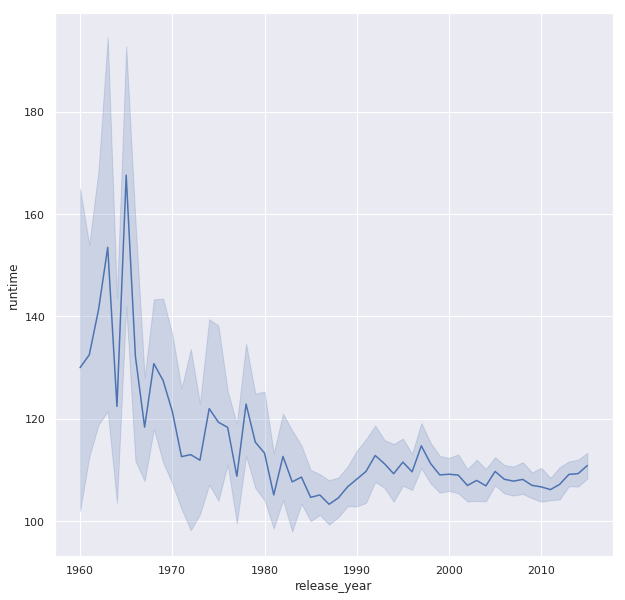

In [28]:
# Let's have a visual of our data above
sns.lineplot(data = df, x = 'release_year', y = 'runtime');

> Movies before 1980 generally had a longer runtime than movies released past 1980. The runtime has been showing a negative trend as years move by. No movie past 1980 has a runtime of over 120 minutes.

### Research Question 3 :- Are movies with higher budget generating higher revenues?

Correlation Between Revenue And Budget :  0.6885561524636783


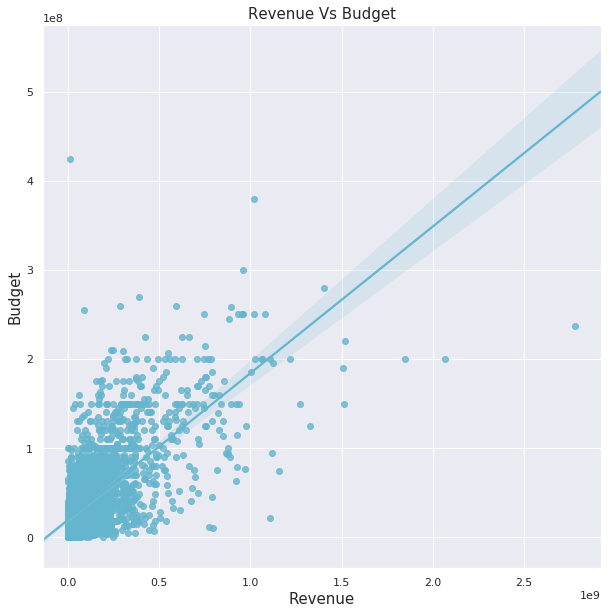

In [29]:
# Change in revenue with budget
# Make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x = df['revenue'], y = df['budget'], color = 'c')


# Set the title and labels of the figure
ax.set_title("Revenue Vs Budget", fontsize = 15)
ax.set_xlabel("Revenue", fontsize = 15)
ax.set_ylabel("Budget", fontsize = 15)


# Set the figure size
sns.set(rc = {'figure.figsize': (8, 8)})
sns.set_style("whitegrid")



# Find the correlation using 'corr()' function.
data_corr = df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

> There is a positive strong correlation between Revenue and Budget (0.6885561) implying that there is a high possibility that movies with higher investments earned higher revenues than movies with lower investments.

### Research Question 4 :- Are more popular movies highly profitable?

Correlation Between Popularity And Profit :  0.5962013674920551


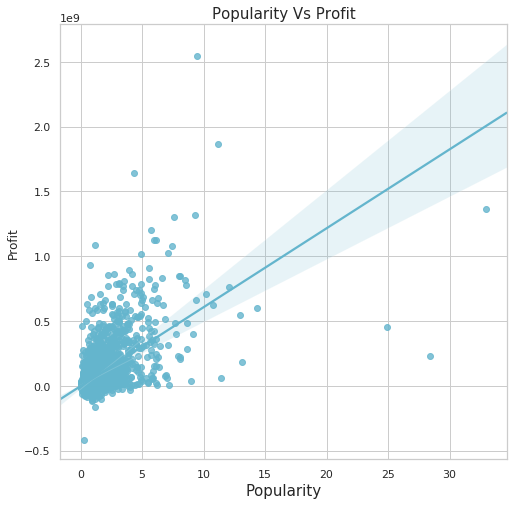

In [30]:
# How does Popularity affect Profitability
# Make a scatter plot using reg-plot between Popularity and Profitability
ax = sns.regplot(x = df['popularity'], y = df['Profit'], color = 'c')

# Set the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit", fontsize = 15)
ax.set_xlabel("Popularity", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 12)

# Set the figure size.
sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

> Popularity and Profit are positively correlated and the correlation is slightly strong depicting that there is a slightly higher chances that the more popular the movie, the more profit it generates.

<a id='conclusions'></a>
## Conclusions
> From my analysis it is clear that:
   * Avator, directed by James Cameroon and produced in the year 2009 is the most profitable movie wheres The Warrior's Way directed by Singmoo Lee and produced in 2010 made the worst profits, becoming the least profitable movie.
   * Movies before 1980 generally had a longer runtime than movies released past 1980. The runtime has been showing a negative trend as years move by. No movie past 1980 has a runtime of over 120 minutes.
   * There is a positive strong correlation between Revenue and Budget (0.6885561) implying that there is a high possibility that movies with higher investments earned higher revenues than movies with lower investments.
   * Popularity and Profit are positively correlated and the correlation is slightly strong depicting that there is a slightly higher chances that the more popular the movie, the more profit it generates.


## Limitations
>   * The results obtained have not been subjected to further statistical tests and therefore may not be reliably accurate. For example without further subjecting my analysis to rigorous statistical tests, I cannot clearly rely on the conclusion that highly profitable movies are the ones that are most popular. This might be inaccurate when other factors are clearly checked into. Same applies to the conclusion that movies with higher investments earn higher returns.



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0